### Importing libraries and data :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette("magma_r")

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

### Understanding the data :

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.set_index('PassengerId', inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Exploratory Data Analysis :

### Cleaning the data (NAN values) :

In [10]:
print("Mean:", train['Age'].mean())
print("Median:", train['Age'].median())
print("Mode:", train['Age'].mode())

Mean: 29.69911764705882
Median: 28.0
Mode: 0    24.0
dtype: float64


In [11]:
train["Age"].fillna(train["Age"].median(), inplace=True)
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
train['Cabin'].isna().sum()

687

In [14]:
train['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [15]:
train['Cabin'].head()

PassengerId
1     NaN
2     C85
3     NaN
4    C123
5     NaN
Name: Cabin, dtype: object

In [16]:
train['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
C22 C26        3
              ..
A32            1
A6             1
B3             1
C148           1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [17]:
most_occur = train['Cabin'].value_counts()[:5].index.tolist()
print(most_occur)

['G6', 'B96 B98', 'C23 C25 C27', 'D', 'C22 C26']


In [18]:
train['Cabin'].fillna(value='U', inplace=True)
train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [19]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
train['Embarked'].fillna(value='S', inplace=True)
train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Feature Engineering :

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [23]:
train.select_dtypes(include=[np.number])

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,28.0,1,2,23.4500


In [24]:
train.select_dtypes(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,U,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,U,S
...,...,...,...,...,...
887,"Montvila, Rev. Juozas",male,211536,U,S
888,"Graham, Miss. Margaret Edith",female,112053,B42,S
889,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,U,S


In [25]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
# train['Sex'] = 
train['Sex'].replace(['male','female'], [0, 1], inplace=True)
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [27]:
train['Sex'] = train['Sex'].astype(np.int64)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [28]:
train.select_dtypes(include=[np.number])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,0,22.0,1,0,7.2500
2,1,1,1,38.0,1,0,71.2833
3,1,3,1,26.0,0,0,7.9250
4,1,1,1,35.0,1,0,53.1000
5,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000
888,1,1,1,19.0,0,0,30.0000
889,0,3,1,28.0,1,2,23.4500


In [29]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [32]:
train['Embarked'] = train['Embarked'].replace(['S','C','Q'], [0, 1, 2])
train['Embarked'] = train['Embarked'].astype(np.int64)
train['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [33]:
train.select_dtypes(include=[np.number])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,0
4,1,1,1,35.0,1,0,53.1000,0
5,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,0
888,1,1,1,19.0,0,0,30.0000,0
889,0,3,1,28.0,1,2,23.4500,0


In [34]:
train['Cabin'].unique()

array(['U', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [35]:
train['Cabin'].head()

PassengerId
1       U
2     C85
3       U
4    C123
5       U
Name: Cabin, dtype: object

In [36]:
cabin_list = train['Cabin'].tolist()
print(cabin_list)

['U', 'C85', 'U', 'C123', 'U', 'U', 'E46', 'U', 'U', 'U', 'G6', 'C103', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D56', 'U', 'A6', 'U', 'U', 'U', 'C23 C25 C27', 'U', 'U', 'U', 'B78', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D33', 'U', 'B30', 'C52', 'U', 'U', 'U', 'U', 'U', 'B28', 'C83', 'U', 'U', 'U', 'F33', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'F G73', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'C23 C25 C27', 'U', 'U', 'U', 'E31', 'U', 'U', 'U', 'A5', 'D10 D12', 'U', 'U', 'U', 'U', 'D26', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'C110', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'B58 B60', 'U', 'U', 'U', 'U', 'E101', 'D26', 'U', 'U', 'U', 'F E69', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D47', 'C123', 'U', 'B86', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'F2', 'U', 'U', 'C2', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'E33', 'U', 'U', 'U', 'B19', 'U', 'U', 'U', 'A7', 'U', 'U', 'C49', 'U', 'U', 'U

In [37]:
for i in range(len(cabin_list)):
    cabin_list[i] = cabin_list[i][0]
print(cabin_list)

['U', 'C', 'U', 'C', 'U', 'U', 'E', 'U', 'U', 'U', 'G', 'C', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D', 'U', 'A', 'U', 'U', 'U', 'C', 'U', 'U', 'U', 'B', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D', 'U', 'B', 'C', 'U', 'U', 'U', 'U', 'U', 'B', 'C', 'U', 'U', 'U', 'F', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'F', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'C', 'U', 'U', 'U', 'E', 'U', 'U', 'U', 'A', 'D', 'U', 'U', 'U', 'U', 'D', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'C', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'B', 'U', 'U', 'U', 'U', 'E', 'D', 'U', 'U', 'U', 'F', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D', 'C', 'U', 'B', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'F', 'U', 'U', 'C', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'E', 'U', 'U', 'U', 'B', 'U', 'U', 'U', 'A', 'U', 'U', 'C', 'U', 'U', 'U', 'U', 'U', 'F', 'U', 'A', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'F', 'B', 'B', 'U', 'U', 'U', 'U',

In [38]:
train['Cabin_New'] = cabin_list
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    int64  
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Cabin      891 non-null    object 
 10  Embarked   891 non-null    int64  
 11  Cabin_New  891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 90.5+ KB


In [39]:
train['Cabin_New'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [40]:
train['Cabin_New'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_New, dtype: int64

In [41]:
train.select_dtypes(include=np.object)

,Name,Ticket,Cabin,Cabin_New
PassengerId,,,,
1,"Braund, Mr. Owen Harris",A/5 21171,U,U
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,C
3,"Heikkinen, Miss. Laina",STON/O2. 3101282,U,U
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,C
5,"Allen, Mr. William Henry",373450,U,U
...,...,...,...,...
887,"Montvila, Rev. Juozas",211536,U,U
888,"Graham, Miss. Margaret Edith",112053,B42,B
889,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,U,U


* Sex of Passengers
* Age group of Passengers
* Embarkment Area
* Fare of Ticket
* Class of Ticket
* Compartment (Maybe)

In [42]:
train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [43]:
age_group = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0}
print(age_group)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}


In [44]:
for age in train['Age']:
    age_group[int(age/10)] += 1;
print(age_group)

{0: 62, 1: 102, 2: 397, 3: 167, 4: 89, 5: 48, 6: 19, 7: 6, 8: 1}


In [45]:
# age_list = train['Age'].tolist()
train['Age_Group'] = train['Age'].apply(lambda x : int(x/10))
train['Age_Group'].unique()

array([2, 3, 5, 0, 1, 4, 6, 7, 8], dtype=int64)

In [46]:
train.select_dtypes(include=np.number)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,2
2,1,1,1,38.0,1,0,71.2833,1,3
3,1,3,1,26.0,0,0,7.9250,0,2
4,1,1,1,35.0,1,0,53.1000,0,3
5,0,3,0,35.0,0,0,8.0500,0,3
...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,0,2
888,1,1,1,19.0,0,0,30.0000,0,1
889,0,3,1,28.0,1,2,23.4500,0,2


In [47]:
train['Age_Group'].value_counts()

2    397
3    167
1    102
4     89
0     62
5     48
6     19
7      6
8      1
Name: Age_Group, dtype: int64

In [48]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_New,Age_Group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,0,U,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,C,3
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,0,U,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,C,3
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,0,U,3


In [49]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811,-0.050972
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702,-0.339610
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569,-0.074794
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165,0.975537
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961,-0.226973
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665,-0.158376
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142,0.099775
Embarked,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000,-0.037171
Age_Group,-0.050972,-0.339610,-0.074794,0.975537,-0.226973,-0.158376,0.099775,-0.037171,1.000000


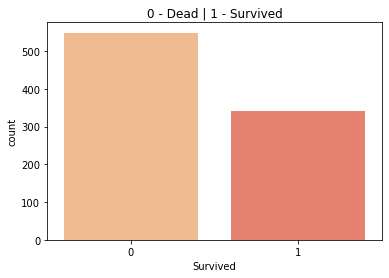

In [50]:
sns.countplot(x = "Survived", data = train)
plt.title("0 - Dead | 1 - Survived")
plt.show()

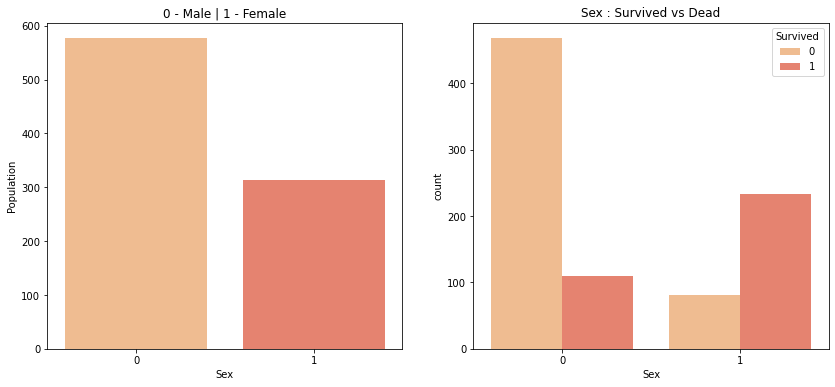

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(x = 'Sex', data = train, ax = ax[0])
ax[0].set_title("0 - Male | 1 - Female")
ax[0].set_ylabel("Population")
sns.countplot(x = 'Sex', hue = 'Survived', data = train, ax = ax[1])
ax[1].set_title("Sex : Survived vs Dead")
plt.show()

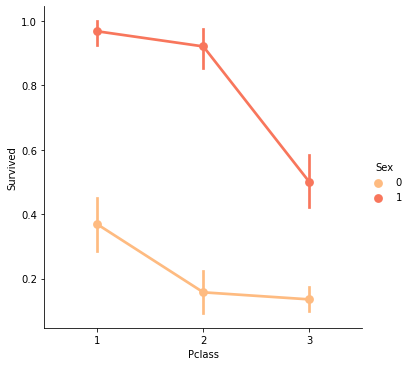

In [52]:
sns.catplot(x = "Pclass", y = "Survived", hue = "Sex", data = train, kind = 'point')
plt.show()

In [53]:
pd.crosstab([train["Sex"], train["Survived"]], train["Pclass"], margins = True).style.background_gradient(cmap = "magma_r")

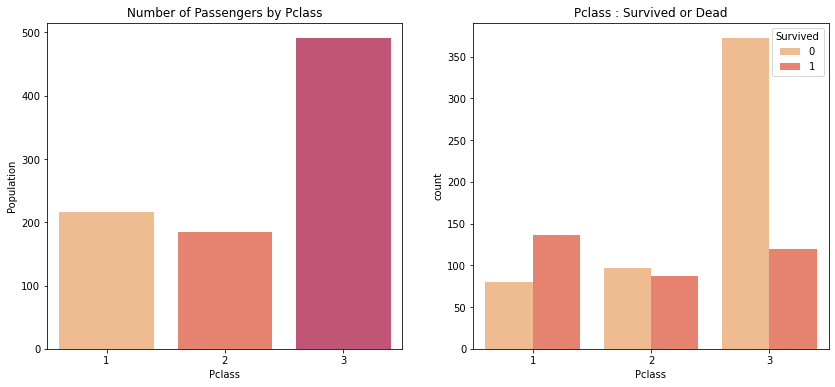

In [54]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(x = 'Pclass', data = train, ax = ax[0])
ax[0].set_title("Number of Passengers by Pclass")
ax[0].set_ylabel("Population")
sns.countplot(x = 'Pclass', hue = 'Survived', data = train, ax = ax[1])
ax[1].set_title("Pclass : Survived or Dead")
plt.show()

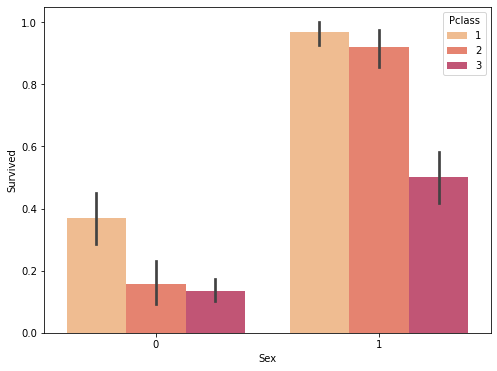

In [55]:
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = train)
plt.show()

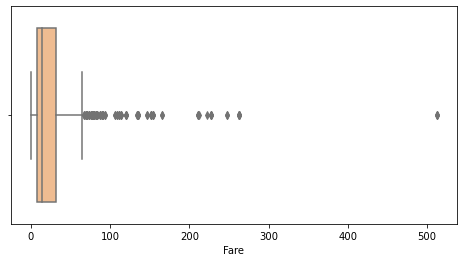

In [56]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = "Fare", data = train)
plt.show()

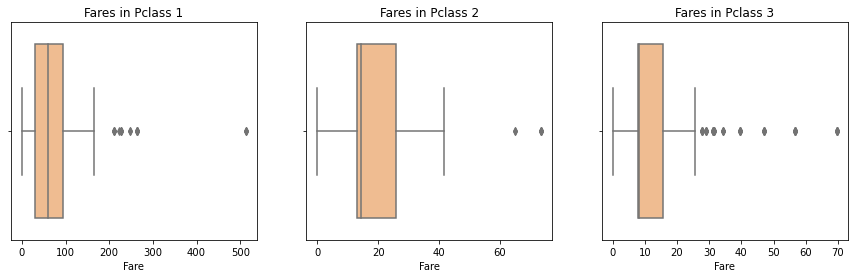

In [59]:
fig, ax = plt.subplots(1, 3, figsize = (15, 4))
sns.boxplot(x = train[train["Pclass"] == 1]["Fare"], ax = ax[0])
ax[0].set_title("Fares in Pclass 1")
sns.boxplot(x = train[train["Pclass"] == 2]["Fare"], ax = ax[1])
ax[1].set_title("Fares in Pclass 2")
sns.boxplot(x = train[train["Pclass"] == 3]["Fare"], ax = ax[2])
ax[2].set_title("Fares in Pclass 3")
plt.show()

In [60]:
pd.crosstab([train['Embarked'], train['Survived']], train['Sex'], margins = True).style.background_gradient(cmap = "magma_r")

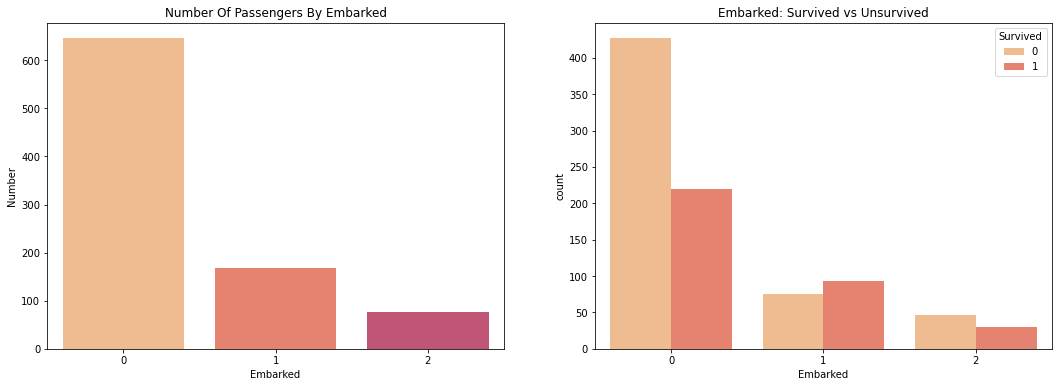

In [66]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.countplot(x = 'Embarked', data = train, ax = ax[0])
ax[0].set_title("Number Of Passengers By Embarked")
ax[0].set_ylabel("Number")
sns.countplot(x = "Embarked", hue = "Survived", data = train, ax = ax[1])
ax[1].set_title("Embarked: Survived vs Unsurvived")
plt.show()

In [67]:
pd.crosstab([train["Embarked"], train["Survived"]], train["Pclass"], margins = True).style.background_gradient(cmap = "magma_r")

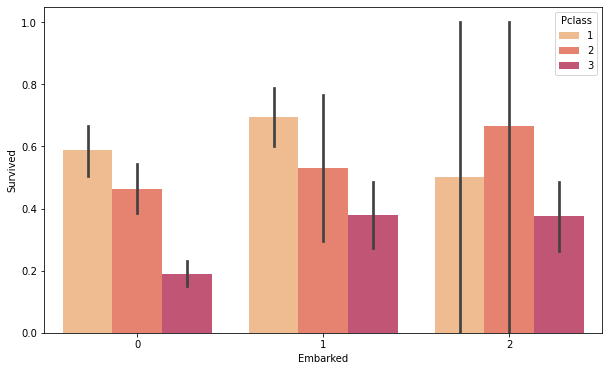

In [72]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Embarked', y = 'Survived', hue = 'Pclass', data = train)
plt.show()